In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
def regression_eqn(ind_array, dep_array, linear=True):
    x_4 = (ind_array**4).sum()
    x_3 = (ind_array**3).sum()
    x_2 = (ind_array**2).sum()
    x_1 = (ind_array).sum()
    n = len(ind_array)
    xy_2 = ((ind_array**2 * dep_array)).sum()
    xy = (ind_array * dep_array).sum()
    if linear:
        matrix1 = [[x_2, ind_array.sum()], [ind_array.sum(), n]]
        matrix2 = [[xy], [dep_array.sum()]]
        invarray1 = np.linalg.inv(matrix1)
        solution = np.dot(invarray1, matrix2)
        return solution
    else:
        matrix1 = [[x_4, x_3, x_2], [x_3, x_2, x_1], [x_2, x_1, n]]
        matrix2 = [[xy_2], [xy], [dep_array.sum()]]
        invarray1 = np.linalg.inv(matrix1)
        solution = np.dot(invarray1, matrix2)
        return solution[0][0], solution[1][0], solution[2][0]
    

    
    
def mean(data):
    total = sum(data)
    m = total/len(data)
    return m
    
def median(data):
    data.sort()
    if len(data)%2 == 0:
        m = (data[len(data)//2] + data[len(data)//2-1])/2
    else:
        m = data[len(data)//2]
    return m

def variance(data):
    new_list = [(val-mean(data))**2 for val in data]
    v = mean(new_list)
    return v

def stand_dev(data):
    v = variance(data)
    s = math.sqrt(v)
    return s
    
    
    
x = np.array([-1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0])
y = np.array([10.0,6.0,2.0,1.0,0.0,2.0,4.0,7.0])

coeff_2, coeff_1, y_int = regression_eqn(x, y, linear=False)
print(coeff_2, coeff_1, y_int)

0.6666666666666663 -3.7142857142857135 5.619047619047617


0.3933978962347216


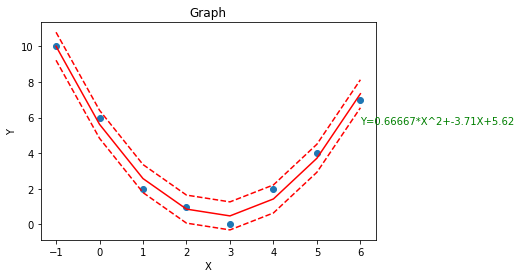

In [3]:
# need to convert residuals to accept a quadratic, scatter plot is partially done

def residuals(xd, yd, n=2):
    xdl = xd.tolist()
    ydl = yd.tolist()
    coeff2, coeff1, y_int = regression_eqn(xd, yd, linear=False)
    ys = [(coeff2 * (val**2)) + (coeff1*val) + y_int for val in xdl]
    r = [yd[n]-ys[n] for n in range(len(ydl))]
    mr = mean(r)
    stdr = stand_dev(r)
    return r, mr, stdr

def scatter_plot_er_2(data1, data2, coeff2, coeff1, y_int, std, title='Graph', xt='X', yt='Y', n=2):
    data1 = data1.tolist()
    data2 = data2.tolist()
    y_vals = []
    e1 = []
    e2 = []
    x_data = [min(data1), max(data1)]
    for val in range(len(data1)):
        ans = (coeff2 * (data1[val]**2)) + (coeff1*data1[val]) + y_int
        y_vals.append(ans)
    for val in range(len(data1)):
        ans = (coeff2 * (data1[val]**2)) + (coeff1*data1[val]) + y_int +(n*std)
        e1.append(ans)
    for val in range(len(data1)):
        ans = (coeff2 * (data1[val]**2)) + (coeff1*data1[val]) + y_int -(n*std)
        e2.append(ans)
    plt.plot(data1, y_vals, '-r')
    plt.plot(data1, e1, '--r')
    plt.plot(data1, e2, '--r')
    plt.scatter(data1, data2)
    plt.title(title)
    plt.xlabel(xt)
    plt.ylabel(yt)
    plt.text(x_data[1], y_vals[1], f'Y={round(coeff2, 5)}*X^2+{round(coeff1, 2)}X+{round(y_int, 2)}', color='g')
    plt.show()
    
    
res, mres, resstd = residuals(x, y)
print(resstd)
scatter_plot_er_2(x, y, coeff_2, coeff_1, y_int, resstd)